# Loan Default Prediction Project

We Solve this Project in 6 Phase

 1. Bussiness Understanding
 2. Data Understanding
 3. Data Preparation
 4. Modeling
 5. Evaluation
 6. Deployment

# 1. Bussiness Understanding

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's largest peer-to-peer lending platform.  Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee. 


Problem Statement: To classify if the borrower will default the loan using borrower’s finance history. That means, given a set of new predictor variables, we need to predict the target variable as 1 -> Defaulter or 0 -> Non-Defaulter. The metric we use to choose the best model is ‘False Negative Rate’. (predictor and target variables explained later) 

### Import Nessecerry Libraries 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings    #remove warning messege in our project file
warnings.filterwarnings('ignore')
from IPython.core.display import HTML    #for good look display we import html display
from sklearn.preprocessing import StandardScaler   #Convert data into Standard Scale
from sklearn.model_selection import train_test_split     #for split data into tranning dataset and testing dataset
from sklearn.feature_selection import RFE     #Feature selection using Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression   #Logistic Regresssion Algrothim
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifer Algrothim
from sklearn.metrics import confusion_matrix,classification_report  #for Confussion matrix and classification report
from sklearn.tree import DecisionTreeClassifier   #Decision Tree Classifier Algrothims
from sklearn.neighbors import KNeighborsClassifier   #KNN(K Near Neghbors Algrothims)

#  2. Data Understanding Phase Start.

In [69]:
#first data set
loan_2012_2013 = pd.read_csv("2012-2013.csv")

In [9]:
#second data set
loan_2014 = pd.read_csv('2014loan.csv')



In [10]:
#Check the type of data set.

print(type(loan_2012_2013),type(loan_2014))

#Check the shape of data set.
print((loan_2012_2013).shape,(loan_2014).shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(188185, 145) (235633, 145)


### Check First Data Set and Collect Information About it

In [12]:
#check Head of our Data frame
loan_2012_2013.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    12000.0      12000.0          12000.0   36 months   
1  NaN        NaN    27050.0      27050.0          27050.0   36 months   
2  NaN        NaN    12000.0      12000.0          12000.0   36 months   
3  NaN        NaN    28000.0      28000.0          28000.0   36 months   
4  NaN        NaN    12000.0      12000.0          12000.0   36 months   

  int_rate  installment grade sub_grade       ...        \
0    7.62%       373.94     A        A3       ...         
1   10.99%       885.46     B        B2       ...         
2   11.99%       398.52     B        B3       ...         
3    7.62%       872.52     A        A3       ...         
4   10.99%       392.81     B        B2       ...         

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   

  disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                Cash                     N                       NaN   
1                Cash                     N                       NaN   
2                Cash                     N                       NaN   
3                Cash                     N                       NaN   
4                Cash                     N                       NaN   

  settlement_status settlement_date settlement_amount  settlement_percentage  \
0               NaN             NaN               NaN                    NaN   
1               NaN             NaN               NaN                    NaN   
2               NaN             NaN               NaN                    NaN   
3               NaN             NaN               NaN                    NaN   
4               NaN             NaN               NaN                    NaN   

  settlement_term  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 145 columns]

In [13]:
loan_2012_2013.describe(include='all')


id  member_id  \
count                                                  2        0.0   
unique                                                 2        NaN   
top     Total amount funded in policy code 1: 2700702175        NaN   
freq                                                   1        NaN   
mean                                                 NaN        NaN   
std                                                  NaN        NaN   
min                                                  NaN        NaN   
25%                                                  NaN        NaN   
50%                                                  NaN        NaN   
75%                                                  NaN        NaN   
max                                                  NaN        NaN   

            loan_amnt   funded_amnt  funded_amnt_inv        term int_rate  \
count   188181.000000  188181.00000    188181.000000      188181   188181   
unique            NaN           NaN              NaN           2      145   
top               NaN           NaN              NaN   36 months   12.12%   
freq              NaN           NaN              NaN      143892     9409   
mean     14354.139366   14351.61985     14339.619132         NaN      NaN   
std       8114.766207    8112.60861      8107.012285         NaN      NaN   
min       1000.000000    1000.00000       950.000000         NaN      NaN   
25%       8000.000000    8000.00000      8000.000000         NaN      NaN   
50%      12175.000000   12125.00000     12100.000000         NaN      NaN   
75%      20000.000000   20000.00000     19975.000000         NaN      NaN   
max      35000.000000   35000.00000     35000.000000         NaN      NaN   

          installment   grade sub_grade       ...        \
count   188181.000000  188181    188181       ...         
unique            NaN       7        35       ...         
top               NaN       B        B3       ...         
freq              NaN   62623     15618       ...         
mean       443.733006     NaN       NaN       ...         
std        242.648831     NaN       NaN       ...         
min          4.930000     NaN       NaN       ...         
25%        269.980000     NaN       NaN       ...         
50%        398.210000     NaN       NaN       ...         
75%        578.310000     NaN       NaN       ...         
max       1408.130000     NaN       NaN       ...         

       hardship_payoff_balance_amount hardship_last_payment_amount  \
count                       80.000000                    80.000000   
unique                            NaN                          NaN   
top                               NaN                          NaN   
freq                              NaN                          NaN   
mean                      6291.665375                   170.367250   
std                       2846.971967                   178.320313   
min                       2221.640000                     0.130000   
25%                       4252.005000                    72.635000   
50%                       5704.460000                   113.405000   
75%                       8253.697500                   217.380000   
max                      15761.170000                   991.790000   

       disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
count               188181                188181                      2051   
unique                   1                     2                        69   
top                   Cash                     N                    Jun-17   
freq                188181                186130                        77   
mean                   NaN                   NaN                       NaN   
std                    NaN                   NaN                       NaN   
min                    NaN                   NaN                       NaN   
25%                    NaN                   NaN                       NaN   
50%                    N

### Check Missing Values in Our first Data set 

In [14]:
#check missing values in first data set
print(loan_2012_2013.isnull().sum())

id                                            188183
member_id                                     188185
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      11738
emp_length                                         4
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [15]:
print('Rows in Data set', loan_2012_2013.shape[0],'Columns in Data set ', loan_2012_2013.shape[1])

Rows in Data set 188185 Columns in Data set  145


## Check Second Data set

In [16]:
loan_2014.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    10400.0      10400.0          10400.0   36 months   
1  NaN        NaN    15000.0      15000.0          15000.0   60 months   
2  NaN        NaN     9600.0       9600.0           9600.0   36 months   
3  NaN        NaN     7650.0       7650.0           7650.0   36 months   
4  NaN        NaN    12800.0      12800.0          12800.0   60 months   

  int_rate  installment grade sub_grade       ...        \
0    6.99%       321.08     A        A3       ...         
1   12.39%       336.64     C        C1       ...         
2   13.66%       326.53     C        C3       ...         
3   13.66%       260.20     C        C3       ...         
4   17.14%       319.08     D        D4       ...         

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   

  disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                Cash                     N                       NaN   
1                Cash                     N                       NaN   
2                Cash                     N                       NaN   
3                Cash                     N                       NaN   
4                Cash                     N                       NaN   

  settlement_status settlement_date settlement_amount  settlement_percentage  \
0               NaN             NaN               NaN                    NaN   
1               NaN             NaN               NaN                    NaN   
2               NaN             NaN               NaN                    NaN   
3               NaN             NaN               NaN                    NaN   
4               NaN             NaN               NaN                    NaN   

  settlement_term  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 145 columns]

In [17]:
loan_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235633 entries, 0 to 235632
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 260.7+ MB


In [18]:
loan_2014.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count        0.0  235629.000000  235629.000000    235629.000000   
mean         NaN   14870.156793   14870.156793     14865.334169   
std          NaN    8438.318193    8438.318193      8435.524995   
min          NaN    1000.000000    1000.000000       950.000000   
25%          NaN    8325.000000    8325.000000      8325.000000   
50%          NaN   13000.000000   13000.000000     13000.000000   
75%          NaN   20000.000000   20000.000000     20000.000000   
max          NaN   35000.000000   35000.000000     35000.000000   

         installment    annual_inc  url            dti    delinq_2yrs  \
count  235629.000000  2.356290e+05  0.0  235629.000000  235629.000000   
mean      442.454925  7.485415e+04  NaN      18.040770       0.344512   
std       245.041761  5.554753e+04  NaN       8.023002       0.898319   
min        23.360000  3.000000e+03  NaN       0.000000       0.000000   
25%       265.680000  4.537700e+04  NaN      12.020000       0.000000   
50%       384.060000  6.500000e+04  NaN      17.630000       0.000000   
75%       578.690000  9.000000e+04  NaN      23.760000       0.000000   
max      1409.990000  7.500000e+06  NaN      39.990000      22.000000   

       inq_last_6mths       ...         deferral_term  hardship_amount  \
count   235629.000000       ...                 503.0       503.000000   
mean         0.755760       ...                   3.0       117.648549   
std          1.033981       ...                   0.0        77.830699   
min          0.000000       ...                   3.0         1.470000   
25%          0.000000       ...                   3.0        59.230000   
50%          0.000000       ...                   3.0       102.550000   
75%          1.000000       ...                   3.0       161.125000   
max          6.000000       ...                   3.0       382.340000   

       hardship_length  hardship_dpd  \
count            503.0    503.000000   
mean               3.0     14.751491   
std                0.0      9.336978   
min                3.0      0.000000   
25%                3.0      7.500000   
50%                3.0     16.000000   
75%                3.0     23.000000   
max                3.0     32.000000   

       orig_projected_additional_accrued_interest  \
count                                  399.000000   
mean                                   350.438195   
std                                    238.523656   
min                                      4.410000   
25%                                    171.255000   
50%                                    303.450000   
75%                                    477.375000   
max                                   1147.020000   

       hardship_payoff_balance_amount  hardship_last_payment_amount  \
count                      503.000000                    503.000000   
mean                      8091.385924                    192.951451   
std                       4599.277400                    149.437673   
min                        174.150000                      0.040000   
25%                       4796.580000                     81.080000   
50%                       7451.380000                    164.550000   
75%                      11214.030000                    274.100000   
max                      21750.750000                    757.420000   

       settlement_amount  settlement_percentage  settlement_term  
count        4238.000000            4238.000000      4238.000000  
mean         4484.115722              46.905694         9.413639  
std          3286.816378              10.081704         8.539733  
min            44.210000               0.550000         0.000000  
25%          2047.202500              45.000000         1.000000  
50%          3779.015000              45.000000         9.000000  
75%          6069.500000              50.000000        16.000000  
max         28000.000000             521.350000        36.00000

### check Missing Values in Second Data Set  

In [19]:
loan_2014.isnull().sum()

id                                            235631
member_id                                     235633
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      13240
emp_length                                         4
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [20]:
loan_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235633 entries, 0 to 235632
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 260.7+ MB


#  3. Data Prepration 

### Concatenation Above Two DataSet and Create a New DataFrame is Called loandataset 

In [21]:
loandataset = pd.concat([loan_2012_2013, loan_2014])

In [22]:
loandataset.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  NaN        NaN    12000.0      12000.0          12000.0   36 months   
1  NaN        NaN    27050.0      27050.0          27050.0   36 months   
2  NaN        NaN    12000.0      12000.0          12000.0   36 months   
3  NaN        NaN    28000.0      28000.0          28000.0   36 months   
4  NaN        NaN    12000.0      12000.0          12000.0   36 months   

  int_rate  installment grade sub_grade       ...        \
0    7.62%       373.94     A        A3       ...         
1   10.99%       885.46     B        B2       ...         
2   11.99%       398.52     B        B3       ...         
3    7.62%       872.52     A        A3       ...         
4   10.99%       392.81     B        B2       ...         

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   

  disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                Cash                     N                       NaN   
1                Cash                     N                       NaN   
2                Cash                     N                       NaN   
3                Cash                     N                       NaN   
4                Cash                     N                       NaN   

  settlement_status settlement_date settlement_amount  settlement_percentage  \
0               NaN             NaN               NaN                    NaN   
1               NaN             NaN               NaN                    NaN   
2               NaN             NaN               NaN                    NaN   
3               NaN             NaN               NaN                    NaN   
4               NaN             NaN               NaN                    NaN   

  settlement_term  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 145 columns]

### Now Check Shape of loandataset 

In [23]:
print('Rows in Data set', loandataset.shape[0],'Columns in Data set ', loandataset.shape[1])

Rows in Data set 423818 Columns in Data set  145


## Missing value Treatment

In [24]:
loandataset.isnull().sum()

id                                            423814
member_id                                     423818
loan_amnt                                          8
funded_amnt                                        8
funded_amnt_inv                                    8
term                                               8
int_rate                                           8
installment                                        8
grade                                              8
sub_grade                                          8
emp_title                                      24978
emp_length                                         8
home_ownership                                     8
annual_inc                                         8
verification_status                                8
issue_d                                            8
loan_status                                        8
pymnt_plan                                         8
url                                           

## Now Drop Empty Columns in loandataset  

In [25]:
loandatasetnew=loandataset.dropna(axis=1,thresh=len(loandataset)*0.9) 

In [26]:
loandatasetnew.shape
loandataset = loandatasetnew

### Check Head Again of loandataset

In [27]:
loandataset.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    12000.0      12000.0          12000.0   36 months    7.62%       373.94   
1    27050.0      27050.0          27050.0   36 months   10.99%       885.46   
2    12000.0      12000.0          12000.0   36 months   11.99%       398.52   
3    28000.0      28000.0          28000.0   36 months    7.62%       872.52   
4    12000.0      12000.0          12000.0   36 months   10.99%       392.81   

  grade sub_grade                            emp_title emp_length  \
0     A        A3                     Systems Engineer    3 years   
1     B        B2  Team Leadern Customer Ops & Systems  10+ years   
2     B        B3                                  LTC  10+ years   
3     A        A3                   Area Sales Manager    5 years   
4     B        B2                      Project Manager    4 years   

          ...          percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0         ...                     100.0                   0.0       0.0   
1         ...                      25.0                   0.0       0.0   
2         ...                       1.0                   0.0       0.0   
3         ...                      16.7                   0.0       0.0   
4         ...                       0.0                   0.0       0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0        233004.0           46738.0        14800.0                    53404.0   
1        138554.0           70186.0        35700.0                    33054.0   
2        365874.0           44327.0        10700.0                    57674.0   
3        850886.0          199739.0        42200.0                   196686.0   
4         29700.0            7137.0        18100.0                        0.0   

  hardship_flag disbursement_method debt_settlement_flag  
0             N                Cash                    N  
1             N                Cash                    N  
2             N                Cash                    N  
3             N                Cash                    N  
4             N                Cash                    N  

[5 rows x 86 columns]

In [28]:
loandataset['purpose'].unique()

array(['debt_consolidation', 'other', 'home_improvement', 'credit_card',
       'major_purchase', 'small_business', 'house', 'moving', 'medical',
       'car', 'vacation', 'renewable_energy', 'wedding', nan], dtype=object)

# What is target column in loandataset ?

'loan_status' 

### Now We Check Some Information About 'loan_status' column

In [29]:
loandataset['loan_status'].head(10)

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4     Fully Paid
5    Charged Off
6     Fully Paid
7     Fully Paid
8     Fully Paid
9     Fully Paid
Name: loan_status, dtype: object

##### Check How many Unique Values in 'loan_status' column
 

In [30]:
loandataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', nan, 'Late (16-30 days)', 'Default'], dtype=object)

######  Here are 8 Type of Unique Values but we target only two type of values 
1. 'Fully Paid'
2. 'Charged off'


##### We Convert Our Column values into 
'Fully Paid' == 0

'Charged off' == 1

and create a new dataset is called Dataset_withBoolTarget 

In [31]:
data_with_loanstatus_sliced = loandataset[(loandataset['loan_status']=="Fully Paid") | (loandataset['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [32]:
Dataset_withBoolTarget['loan_status'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

##### Now Count How many Number of fully paid and charged off values 

In [33]:
print(Dataset_withBoolTarget['loan_status'].value_counts())
print('\n')
print("Current shape of dataset :",Dataset_withBoolTarget.shape)
Dataset_withBoolTarget.head(3)

0    340444
1     70829
Name: loan_status, dtype: int64


Current shape of dataset : (411273, 86)


loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    12000.0      12000.0          12000.0   36 months    7.62%       373.94   
1    27050.0      27050.0          27050.0   36 months   10.99%       885.46   
2    12000.0      12000.0          12000.0   36 months   11.99%       398.52   

  grade sub_grade                            emp_title emp_length  \
0     A        A3                     Systems Engineer    3 years   
1     B        B2  Team Leadern Customer Ops & Systems  10+ years   
2     B        B3                                  LTC  10+ years   

          ...          percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0         ...                     100.0                   0.0       0.0   
1         ...                      25.0                   0.0       0.0   
2         ...                       1.0                   0.0       0.0   

  tot_hi_cred_lim  total_bal_ex_mort total_bc_limit  \
0        233004.0            46738.0        14800.0   
1        138554.0            70186.0        35700.0   
2        365874.0            44327.0        10700.0   

  total_il_high_credit_limit hardship_flag disbursement_method  \
0                    53404.0             N                Cash   
1                    33054.0             N                Cash   
2                    57674.0             N                Cash   

  debt_settlement_flag  
0                    N  
1                    N  
2                    N  

[3 rows x 86 columns]

##### Check Missing Values in Dataset_withBoolTarget 

In [34]:
Dataset_withBoolTarget.isnull().sum()


loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     24490
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             7
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

### Check Corr-relation between each columns in Dataset

In [35]:
Dataset_withBoolTarget.corr()

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                    1.000000     0.999912         0.999850   
funded_amnt                  0.999912     1.000000         0.999942   
funded_amnt_inv              0.999850     0.999942         1.000000   
installment                  0.953286     0.953389         0.953344   
annual_inc                   0.384623     0.384622         0.384613   
loan_status                  0.056539     0.056501         0.056489   
dti                          0.032390     0.032404         0.032488   
delinq_2yrs                  0.000793     0.000813         0.000894   
inq_last_6mths              -0.003977    -0.004000        -0.003859   
open_acc                     0.193112     0.193141         0.193218   
pub_rec                     -0.093022    -0.092991        -0.092913   
revol_bal                    0.337410     0.337421         0.337408   
total_acc                    0.226534     0.226542         0.226598   
out_prncp                         NaN          NaN              NaN   
out_prncp_inv                     NaN          NaN              NaN   
total_pymnt                  0.889625     0.889711         0.889744   
total_pymnt_inv              0.889609     0.889700         0.889765   
total_rec_prncp              0.835544     0.835644         0.835651   
total_rec_int                0.685643     0.685664         0.685745   
total_rec_late_fee           0.079164     0.079192         0.079223   
recoveries                   0.190340     0.190346         0.190367   
collection_recovery_fee      0.173499     0.173525         0.173539   
last_pymnt_amnt              0.450339     0.450358         0.450424   
collections_12_mths_ex_med  -0.012517    -0.012506        -0.012488   
policy_code                       NaN          NaN              NaN   
acc_now_delinq               0.003556     0.003565         0.003570   
tot_coll_amt                -0.002840    -0.002840        -0.002839   
tot_cur_bal                  0.331938     0.331935         0.331926   
total_rev_hi_lim             0.288331     0.288329         0.288305   
acc_open_past_24mths        -0.001345    -0.001356        -0.001260   
...                               ...          ...              ...   
chargeoff_within_12_mths     0.004335     0.004347         0.004354   
delinq_amnt                  0.000120     0.000123         0.000111   
mo_sin_old_il_acct           0.143820     0.143819         0.143804   
mo_sin_old_rev_tl_op         0.182603     0.182601         0.182578   
mo_sin_rcnt_rev_tl_op        0.058857     0.058858         0.058804   
mo_sin_rcnt_tl               0.024929     0.024931         0.024858   
mort_acc                     0.239074     0.239089         0.239084   
mths_since_recent_bc         0.042507     0.042502         0.042466   
num_accts_ever_120_pd       -0.057529    -0.057535        -0.057516   
num_actv_bc_tl               0.184571     0.184571         0.184584   
num_actv_rev_tl              0.143895     0.143893         0.143925   
num_bc_sats                  0.199480     0.199472         0.199473   
num_bc_tl                    0.187010     0.187007         0.186968   
num_il_tl                    0.090260     0.090256         0.090277   
num_op_rev_tl                0.171518     0.171514         0.171532   
num_rev_accts                0.177359     0.177353         0.177341   
num_rev_tl_bal_gt_0          0.147076     0.147075         0.147106   
num_sats                     0.195303     0.195299         0.195329   
num_tl_120dpd_2m            -0.001590    -0.001590        -0.001597   
num_tl_30dpd                 0.005764     0.005764         0.005762   
num_tl_90g_dpd_24m          -0.018648    -0.018654        -0.018653   
num_tl_op_past_12m          -0.026372    -0.026382        -0.026291   
pct_tl_nvr_dlq               0.101392     0.101392         0.101354   
percent_bc_gt_75             0.008776     0.008785         0.008801   
pub_rec_bankruptcies        -0.127749    -0.127722  

In [36]:
type(Dataset_withBoolTarget.corr())

pandas.core.frame.DataFrame

In [37]:
Dataset_withBoolTarget_corr=Dataset_withBoolTarget.corr()

### Here We Drop Some More Unrelvent Values in DataSet 

In [38]:
s=Dataset_withBoolTarget_corr.loc['loan_status',:]
list_week_relation_pos=s[(s <0.1) & (s> 0)] 
list_week_relation_neg=s[(s > -0.1) & (s < 0)]  

list_ps=list(list_week_relation_pos.index)
list_ng=list(list_week_relation_neg.index)
list_column_to_drop=list_ps+list_ng
print(len(list_column_to_drop))

#Dataset_withBoolTarget.drop(list_column_to_drop,axis=1,inplace=True)
print(Dataset_withBoolTarget.shape)

print(Dataset_withBoolTarget.head(5))

52
(411273, 86)
   loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    12000.0      12000.0          12000.0   36 months    7.62%       373.94   
1    27050.0      27050.0          27050.0   36 months   10.99%       885.46   
2    12000.0      12000.0          12000.0   36 months   11.99%       398.52   
3    28000.0      28000.0          28000.0   36 months    7.62%       872.52   
4    12000.0      12000.0          12000.0   36 months   10.99%       392.81   

  grade sub_grade                            emp_title emp_length  \
0     A        A3                     Systems Engineer    3 years   
1     B        B2  Team Leadern Customer Ops & Systems  10+ years   
2     B        B3                                  LTC  10+ years   
3     A        A3                   Area Sales Manager    5 years   
4     B        B2                      Project Manager    4 years   

          ...          percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0         ...

In [39]:
Dataset_withBoolTarget.info()
# we can see there are many categorical column where we should apply our domain knowledge and if any looks not important we should drop it .
col_to_drop=['zip_code','title','grade','application_type','policy_code','addr_state','earliest_cr_line','sub_grade','issue_d','pymnt_plan','last_pymnt_d']
print(col_to_drop)
#Dataset_withBoolTarget.drop(list_column_to_drop,axis=1,inplace=True)
print(Dataset_withBoolTarget.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 235628
Data columns (total 86 columns):
loan_amnt                     411273 non-null float64
funded_amnt                   411273 non-null float64
funded_amnt_inv               411273 non-null float64
term                          411273 non-null object
int_rate                      411273 non-null object
installment                   411273 non-null float64
grade                         411273 non-null object
sub_grade                     411273 non-null object
emp_title                     386783 non-null object
emp_length                    411273 non-null object
home_ownership                411273 non-null object
annual_inc                    411273 non-null float64
verification_status           411273 non-null object
issue_d                       411273 non-null object
loan_status                   411273 non-null int64
pymnt_plan                    411273 non-null object
purpose                       411273 

### Here we Create our Final DataFrame is called 'Final_data' 

In [40]:
features = ['int_rate','grade','emp_length','home_ownership','loan_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','purpose'] 
Final_data = Dataset_withBoolTarget[features] #19 features with target var


In [41]:
Final_data.head(10)

int_rate grade emp_length home_ownership  loan_status  out_prncp  \
0    7.62%     A    3 years       MORTGAGE            0        0.0   
1   10.99%     B  10+ years            OWN            0        0.0   
2   11.99%     B  10+ years       MORTGAGE            0        0.0   
3    7.62%     A    5 years       MORTGAGE            0        0.0   
4   10.99%     B    4 years           RENT            0        0.0   
5   19.97%     D    6 years       MORTGAGE            1        0.0   
6   14.98%     C  10+ years       MORTGAGE            0        0.0   
7   13.98%     C     1 year           RENT            0        0.0   
8   13.53%     B  10+ years           RENT            0        0.0   
9   10.99%     B    2 years       MORTGAGE            0        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  13397.540000         13397.54         12000.00   
1            0.0  31752.530000         31752.53         27050.00   
2            0.0  14346.479050         14346.48         12000.00   
3            0.0  29150.980000         29150.98         28000.00   
4            0.0  13988.610000         13988.61         12000.00   
5            0.0  30303.089990         30303.09         14738.17   
6            0.0  13575.640010         13575.64         11100.00   
7            0.0  11989.980010         11989.98          9750.00   
8            0.0  13359.776860         13359.78         12000.00   
9            0.0   5157.519457          5157.52          4800.00   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0                 0.0        0.00                   0.0000          2927.22   
1                 0.0        0.00                   0.0000          6074.19   
2                 0.0        0.00                   0.0000           398.28   
3                 0.0        0.00                   0.0000         23915.86   
4                 0.0        0.00                   0.0000          3775.55   
5                 0.0     1802.67                 324.4806           730.78   
6                 0.0        0.00                   0.0000          4343.32   
7                 0.0        0.00                   0.0000           663.22   
8                 0.0        0.00                   0.0000           119.17   
9                 0.0        0.00                   0.0000          3900.48   

              purpose  
0  debt_consolidation  
1  debt_consolidation  
2  debt_consolidation  
3  debt_consolidation  
4  debt_consolidation  
5  debt_consolidation  
6               other  
7  debt_consolidation  
8  debt_consolidation  
9    home_improvement

In [42]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 235628
Data columns (total 15 columns):
int_rate                   411273 non-null object
grade                      411273 non-null object
emp_length                 411273 non-null object
home_ownership             411273 non-null object
loan_status                411273 non-null int64
out_prncp                  411273 non-null float64
out_prncp_inv              411273 non-null float64
total_pymnt                411273 non-null float64
total_pymnt_inv            411273 non-null float64
total_rec_prncp            411273 non-null float64
total_rec_late_fee         411273 non-null float64
recoveries                 411273 non-null float64
collection_recovery_fee    411273 non-null float64
last_pymnt_amnt            411273 non-null float64
purpose                    411273 non-null object
dtypes: float64(9), int64(1), object(5)
memory usage: 50.2+ MB


## Data Transformation
Here we do some transformation in 4 Columns of Object Type

How we transformation in these columns ?
1. 'grade' = ['A', 'B', 'D', 'C', 'E', 'F', 'G'] to [7,6,5,4,3,2,1]
2. 'home_ownership' = ['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'] to [6,5,4,3,2,1]
3. 'emp_length' = ['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year','2 years', '7 years', '9 years', '8 years', '< 1 year', 'n/a']  to [int], remove string values , n/a and change type to int
4. 'int_rate' = remove % sign and change to int

In [43]:
Final_data['grade'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [44]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'], dtype=object)

In [45]:
Final_data['emp_length'].unique()

array(['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year',
       '2 years', '7 years', '9 years', '8 years', '< 1 year', 'n/a'], dtype=object)

In [46]:
#Final_data['int_rate'].unique()

In [47]:
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)


Current shape of dataset : (411273, 15)


In [48]:
#Data encoding
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
#Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (411273, 15)


int_rate  grade emp_length  home_ownership  loan_status  out_prncp  \
0      7.62      7          3               6            0        0.0   
1     10.99      6         10               4            0        0.0   
2     11.99      6         10               6            0        0.0   
3      7.62      7          5               6            0        0.0   
4     10.99      6          4               5            0        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0  13397.54000         13397.54          12000.0   
1            0.0  31752.53000         31752.53          27050.0   
2            0.0  14346.47905         14346.48          12000.0   
3            0.0  29150.98000         29150.98          28000.0   
4            0.0  13988.61000         13988.61          12000.0   

   total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_amnt  \
0                 0.0         0.0                      0.0          2927.22   
1                 0.0         0.0                      0.0          6074.19   
2                 0.0         0.0                      0.0           398.28   
3                 0.0         0.0                      0.0         23915.86   
4                 0.0         0.0                      0.0          3775.55   

              purpose  
0  debt_consolidation  
1  debt_consolidation  
2  debt_consolidation  
3  debt_consolidation  
4  debt_consolidation

# Exploratory Data Analysis 

Text(0.5,0,'loan_status')

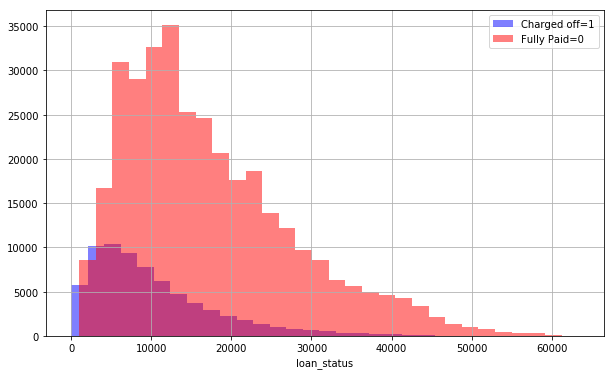

In [67]:
plt.figure(figsize=(10,6))
Final_data[Final_data['loan_status']==1]['total_pymnt'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Charged off=1')
Final_data[Final_data['loan_status']==0]['total_pymnt'].hist(alpha=0.5,color='red',
                                              bins=30,label='Fully Paid=0')
plt.legend()
plt.xlabel('loan_status')

### Check Numbers of Fully Paid and Charged off Customers

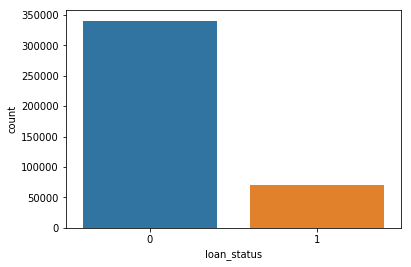

In [66]:
sns.countplot(x='loan_status',data=Final_data)

### Here We Check Purpose of Loan By Visualization Graph

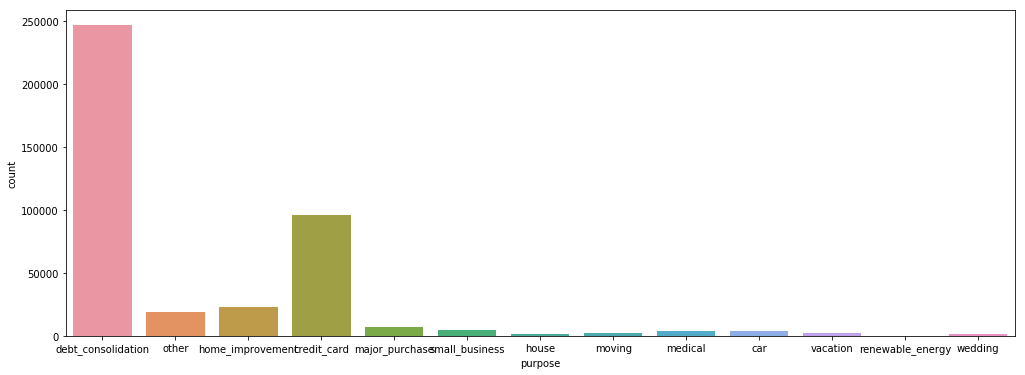

In [65]:
plt.figure(figsize=(17,6))
sns.countplot(x='purpose',data=Final_data)

In Above 'purpose' Columns have 13 Unique Values and we see 'debt_consolidation' type value are 246500 it means 246500 people get loan 

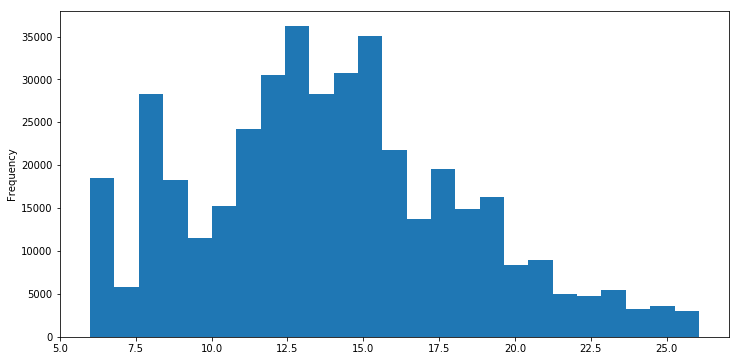

In [59]:
plt.figure(figsize=(12,6))
Final_data['int_rate'].plot(kind='hist',bins=25)

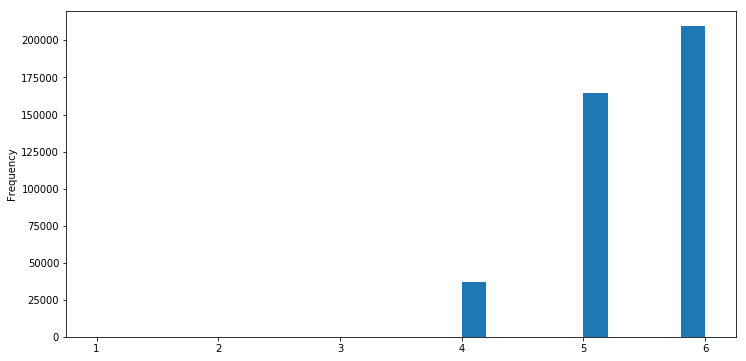

In [60]:
plt.figure(figsize=(12,6))
Final_data['home_ownership'].plot(kind='hist',bins=25)

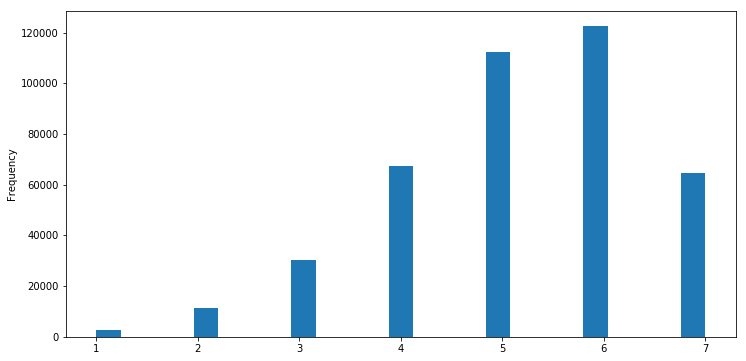

In [61]:
plt.figure(figsize=(12,6))
Final_data['grade'].plot(kind='hist',bins=25)

In [77]:
#just drop Purpose column because its a object type column and we don't use object type columns when convert Standard Scale
Final_data1 = Final_data.drop('purpose',axis=1)

###  In Final_data set all values are int or float type that's good for our project Now we check missing values again and fill all the missing values and create a clean data set 

# Convert Dataset to Standard scale datset

In [78]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler() #instance of preprocessing

fields = Final_data1.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data1[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()

0    340444
1     70829
Name: loan_status, dtype: int64

In [79]:
data_clean.head()

int_rate     grade  emp_length  home_ownership  loan_status  out_prncp  \
0 -1.439964  1.387048   -0.787331        0.890293            0        0.0   
1 -0.672232  0.620423    1.130234       -2.171730            0        0.0   
2 -0.444419  0.620423    1.130234        0.890293            0        0.0   
3 -1.439964  1.387048   -0.239455        0.890293            0        0.0   
4 -0.672232  0.620423   -0.513393       -0.640718            0        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0    -0.256095        -0.255391        -0.088988   
1            0.0     1.472015         1.473574         1.697165   
2            0.0    -0.166753        -0.166005        -0.088988   
3            0.0     1.227081         1.228519         1.809912   
4            0.0    -0.200447        -0.199715        -0.088988   

   total_rec_late_fee  recoveries  collection_recovery_fee  
0           -0.136275   -0.244752                -0.214206  
1           -0.136275   -0.244752                -0.214206  
2           -0.136275   -0.244752                -0.214206  
3           -0.136275   -0.244752                -0.214206  
4           -0.136275   -0.244752                -0.214206

In [80]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (11000, 13)


int_rate     grade  emp_length  home_ownership  loan_status  out_prncp  \
0 -0.638060  0.620423    1.130234        0.890293            0        0.0   
1 -1.553870  1.387048    1.130234       -0.640718            0        0.0   
2 -0.517319  0.620423    1.130234       -0.640718            0        0.0   
3  0.125114 -0.146201   -0.239455        0.890293            1        0.0   
4  0.311921 -0.146201    1.130234        0.890293            0        0.0   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0    -0.251657        -0.250951        -0.029647   
1            0.0    -0.625748        -0.625227        -0.504372   
2            0.0    -0.398506        -0.397872        -0.326351   
3            0.0    -0.964659        -0.964305        -1.279368   
4            0.0     2.258819         2.260768         2.284637   

   total_rec_late_fee  recoveries  collection_recovery_fee  
0           -0.136275   -0.244752                -0.214206  
1           -0.136275   -0.244752                -0.214206  
2           -0.136275   -0.244752                -0.214206  
3           -0.136275    1.994380                 2.215444  
4           -0.136275   -0.244752                -0.214206

### Drop Three More Column Becaues it's all null values

In [81]:
dropC=['emp_length','out_prncp','out_prncp_inv']                    
data_clean.drop(dropC,axis=1,inplace=True)

###  After Standarizie Values we see a clean a Standard scale data set and this DataSet is Ready fo Trainning and Testing for Our Model. 

## In this Part of Our Project we see Correlation Between all column to each other 

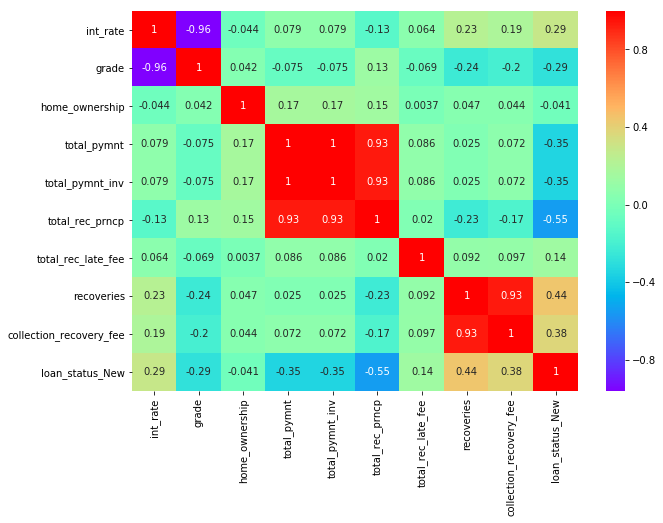

In [132]:
plt.figure(figsize=(10,7))
sns.heatmap(data_clean.corr(),cmap='rainbow',annot=True)

In [82]:
data_clean.corr() 

int_rate     grade  home_ownership  loan_status  \
int_rate                 1.000000 -0.961059       -0.043765     0.289366   
grade                   -0.961059  1.000000        0.042395    -0.286560   
home_ownership          -0.043765  0.042395        1.000000    -0.040653   
loan_status              0.289366 -0.286560       -0.040653     1.000000   
total_pymnt              0.078848 -0.074599        0.166093    -0.347199   
total_pymnt_inv          0.078962 -0.074751        0.166086    -0.347194   
total_rec_prncp         -0.128613  0.130336        0.148388    -0.546265   
total_rec_late_fee       0.063878 -0.069329        0.003686     0.136740   
recoveries               0.233079 -0.239358        0.047487     0.440824   
collection_recovery_fee  0.188396 -0.201326        0.043981     0.376807   

                         total_pymnt  total_pymnt_inv  total_rec_prncp  \
int_rate                    0.078848         0.078962        -0.128613   
grade                      -0.074599        -0.074751         0.130336   
home_ownership              0.166093         0.166086         0.148388   
loan_status                -0.347199        -0.347194        -0.546265   
total_pymnt                 1.000000         0.999994         0.931209   
total_pymnt_inv             0.999994         1.000000         0.931203   
total_rec_prncp             0.931209         0.931203         1.000000   
total_rec_late_fee          0.085680         0.085715         0.020412   
recoveries                  0.024673         0.024660        -0.230691   
collection_recovery_fee     0.071551         0.071533        -0.168382   

                         total_rec_late_fee  recoveries  \
int_rate                           0.063878    0.233079   
grade                             -0.069329   -0.239358   
home_ownership                     0.003686    0.047487   
loan_status                        0.136740    0.440824   
total_pymnt                        0.085680    0.024673   
total_pymnt_inv                    0.085715    0.024660   
total_rec_prncp                    0.020412   -0.230691   
total_rec_late_fee                 1.000000    0.091724   
recoveries                         0.091724    1.000000   
collection_recovery_fee            0.096739    0.931512   

                         collection_recovery_fee  
int_rate                                0.188396  
grade                                  -0.201326  
home_ownership                          0.043981  
loan_status                             0.376807  
total_pymnt                             0.071551  
total_pymnt_inv                         0.071533  
total_rec_prncp                        -0.168382  
total_rec_late_fee                      0.096739  
recoveries                              0.931512  
collection_recovery_fee                 1.000000

# 4. Model Creation 

## Train test split

In [83]:
from sklearn.model_selection import train_test_split

#### Divide DataSet into Training and Testing DataSet  

In [84]:
data_clean.head()
#print(data_clean.isnull().sum())
data_clean['loan_status_New']=data_clean['loan_status']
data_clean.head(2)
data_clean.drop('loan_status',axis=1,inplace=True)

###  Now we create a two different variable First X variable hold all column without target  and y varable hold our target column 

In [85]:
X = data_clean.iloc[:,:-1]
y = data_clean.iloc[:,-1]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Evalulate Different Models and Find Best Accuracy in Models
Here is a List of Differnet type of Algrothims we use
1. Random Forest Classifer
2. Decision Tree
3. Logistic Regression Classifer
4. K Near Neighbors 

## Train DataSet Using  Random Forest model


In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(n_estimators=600)  #create instance


In [89]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluation of Random Forest Model

In [90]:
prediction = rfc.predict(X_test)

In [91]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [92]:
rfc_report = classification_report(y_test,prediction)
print(rfc_report)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      1656
          1       0.99      0.96      0.98      1644

avg / total       0.98      0.98      0.98      3300



In [93]:
print(confusion_matrix(y_test,prediction))

[[1645   11]
 [  68 1576]]


In [94]:
print(confusion_matrix(y_test,prediction))

print(accuracy_score(y_test, prediction, normalize=True))

[[1645   11]
 [  68 1576]]
0.976060606061


## Train DataSet Using Decision Tree Algrothim


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier()

In [97]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Evaluation of Decision Tree Model

In [98]:
prediction = dtree.predict(X_test)

In [99]:
#Confusion matrix and classification report
dtree_report=classification_report(y_test,prediction)
print(dtree_report)

             precision    recall  f1-score   support

          0       0.96      0.97      0.97      1656
          1       0.97      0.96      0.97      1644

avg / total       0.97      0.97      0.97      3300



In [100]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test, prediction, normalize=True))

[[1606   50]
 [  59 1585]]
0.96696969697


## Train DataSet Using Logistic Regression Algrothim

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr = LogisticRegression()

In [103]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evalution of Logistic Regression Model

In [104]:
prediction = lr.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report


In [106]:
print(confusion_matrix(y_test,prediction))

[[1583   73]
 [ 122 1522]]


In [107]:
lreport=(classification_report(y_test,prediction))
print(lreport)
print(accuracy_score(y_test, prediction, normalize=True))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1656
          1       0.95      0.93      0.94      1644

avg / total       0.94      0.94      0.94      3300

0.940909090909


## Train DataSet Using  KNN Algrothim

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
knn = KNeighborsClassifier(n_neighbors=1)

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Evalution of KNN Model

In [111]:
pred = knn.predict(X_test)

In [112]:
print(confusion_matrix(y_test,pred))

[[1542  114]
 [ 200 1444]]


In [113]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91      1656
          1       0.93      0.88      0.90      1644

avg / total       0.91      0.90      0.90      3300



## Choosing a K Value and so Create Model Again for Better Accuracy Rate
### Here We Work with loop and Check K Values 1 to 40 and Chosses a Value where maxium values 

In [114]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

###  Chosses a K Value According to Graph 

Text(0,0.5,'Error Rate')

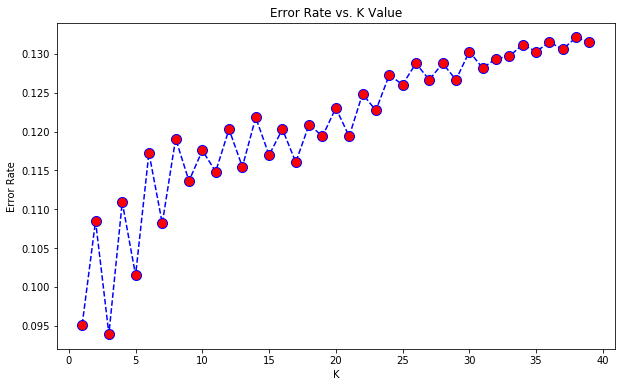

In [115]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retrain with new K Value

In [116]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
knnreport=(classification_report(y_test,pred))
print(knnreport)

WITH K=34


[[1535  121]
 [ 312 1332]]


             precision    recall  f1-score   support

          0       0.83      0.93      0.88      1656
          1       0.92      0.81      0.86      1644

avg / total       0.87      0.87      0.87      3300



## Here we Check Classification Report for all above Models and Check Who's Model Give us Best Accuracy Score. 

In [124]:
print("________________Random Forest Classification Report__________________\n")
print('RFC',rfc_report)
print('**********************************************************************\n')
print("________________Decision Tree Classification Report__________________\n")
print('DTree',dtree_report)
print('**********************************************************************\n')
print("________________Logistic Regression Classification Report__________________\n")
print('llogtt',lreport)
print('**********************************************************************\n')
print("________________K Nearest Neighbor Classification Report__________________\n")
print('knnreport',knnreport)

________________Random Forest Classification Report__________________

RFC              precision    recall  f1-score   support

          0       0.96      0.99      0.98      1656
          1       0.99      0.96      0.98      1644

avg / total       0.98      0.98      0.98      3300

**********************************************************************

________________Decision Tree Classification Report__________________

DTree              precision    recall  f1-score   support

          0       0.96      0.97      0.97      1656
          1       0.97      0.96      0.97      1644

avg / total       0.97      0.97      0.97      3300

**********************************************************************

________________Logistic Regression Classification Report__________________

llogtt              precision    recall  f1-score   support

          0       0.93      0.96      0.94      1656
          1       0.95      0.93      0.94      1644

avg / total       0.94      0

# Conclusion  

### We Check all of these Model Result and than we getb Random Forest Model have a Best Accuracy other than and it's also have a Better Classification Report. So,We can say that  'The random forest model is best for our dataset'.